# DDA3020 ASS1
#### Name: Yang-JH



## Problem.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### Step1. Load Datasets

In [2]:
data = pd.read_csv('./house_prices.csv')

In [3]:
data.head()

,SqFt,Bedrooms,Bathrooms,Neighborhood,Price
0,1790,2,2,East,114300
1,2030,4,2,East,114200
2,1740,3,2,East,114800
3,1980,3,2,East,94700
4,2130,3,3,East,119800


In [4]:
data['Neighborhood']=data['Neighborhood'].astype('category')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SqFt          128 non-null    int64   
 1   Bedrooms      128 non-null    int64   
 2   Bathrooms     128 non-null    int64   
 3   Neighborhood  128 non-null    category
 4   Price         128 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 4.4 KB


In [6]:
data.describe()

,SqFt,Bedrooms,Bathrooms,Price
count,128.000000,128.000000,128.000000,128.000000
mean,2000.937500,3.023438,2.445312,130427.343750
std,211.572431,0.725951,0.514492,26868.770371
min,1450.000000,2.000000,2.000000,69100.000000
25%,1880.000000,3.000000,2.000000,111325.000000
50%,2000.000000,3.000000,2.000000,125950.000000
75%,2140.000000,3.000000,3.000000,148250.000000
max,2590.000000,5.000000,4.000000,211200.000000


In [7]:
data.head()

,SqFt,Bedrooms,Bathrooms,Neighborhood,Price
0,1790,2,2,East,114300
1,2030,4,2,East,114200
2,1740,3,2,East,114800
3,1980,3,2,East,94700
4,2130,3,3,East,119800


### Step2. Visualize Dataset

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


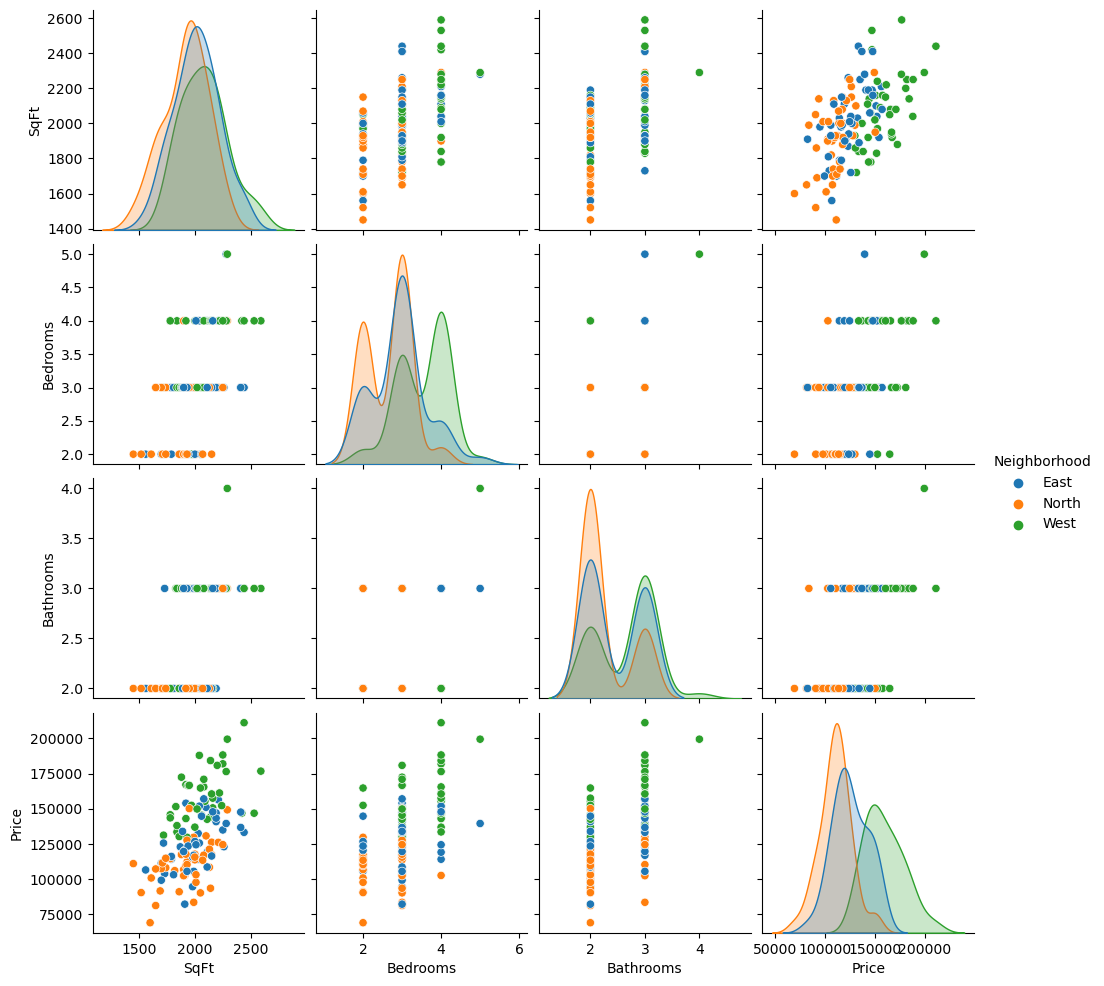

In [8]:
sns.pairplot(data, hue="Neighborhood")

In [9]:
data_dummy = pd.get_dummies(data)
data_dummy.head()

,SqFt,Bedrooms,Bathrooms,Price,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,1790,2,2,114300,True,False,False
1,2030,4,2,114200,True,False,False
2,1740,3,2,114800,True,False,False
3,1980,3,2,94700,True,False,False
4,2130,3,3,119800,True,False,False


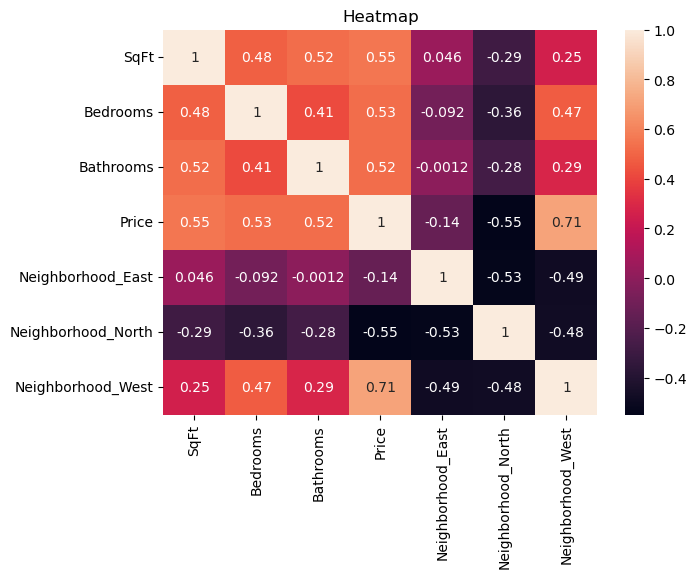

In [10]:
fig=plt.figure(figsize=(7,5))
sns.heatmap(data_dummy.corr(), annot = True, yticklabels = True,)
plt.title("Heatmap")
plt.show()

### Step3.  Process the Category Variable

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Neighborhood'])], remainder='passthrough')
X = data.drop("Price", axis=1)
y = data["Price"]
X_encode = np.array(ct.fit_transform(X))

In [12]:
train_X, test_X, train_y, test_y = train_test_split(X_encode, y, test_size=0.2, random_state=3313)
print("train size: ", train_X.shape[0])
print("test size: ", test_X.shape[0])

train size:  102
test size:  26


### Step4. Apply Linear Regression Model

In [13]:
LR = linear_model.LinearRegression()
LR.fit(train_X, train_y)
y_pred_train = LR.predict(train_X)
y_pred_test = LR.predict(test_X)

In [14]:
import math
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_pred_train, train_y)
MSE_test = mean_squared_error(y_pred_test, test_y)
RMSE_train = math.sqrt(MSE_train)
RMSE_test = math.sqrt(MSE_test)
print("RMSE_train:", RMSE_train)
print("RMSE_test:", RMSE_test)

RMSE_train: 14369.706324248733
RMSE_test: 15043.394845362904


## Problem.2

### Step.1 LR Model

In [15]:
data2 = pd.read_csv('./diabetes.csv')

In [16]:
data2.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [17]:
X2 = data2.drop("target", axis=1)
y2 = data2["target"]

In [18]:
def  GradientDescent(X,y,stepsize,interations):
    w = np.zeros(X.shape[1])
    loss = []
    for i in range(interations):
        loss.append(np.sum((X.dot(w)-y)*(X.dot(w)-y))/(2*y.shape[0]))
        gradient = (X.T).dot(X.dot(w)-y)
        w = w - stepsize*gradient
    return  w,loss

### Step.2 Train and Test

In [19]:
train_X2, test_X2, train_y2, test_y2 = train_test_split(X2, y2, test_size=0.2, random_state=3313)
train_X2 = np.concatenate((np.ones((train_X2.shape[0],1)),train_X2), axis=1)
test_X2 = np.concatenate((np.ones((test_X2.shape[0],1)),test_X2), axis=1)
print("train2 size: ", train_X2.shape[0])
print("test2 size: ", test_X2.shape[0])

train2 size:  353
test2 size:  89


In [20]:
w,loss = GradientDescent(train_X2,train_y2,0.0001,100)
RMSE2_train = math.sqrt(np.sum((train_X2.dot(w)-train_y2)*(train_X2.dot(w)-train_y2))/train_y2.shape[0])
RMSE2_test = math.sqrt(np.sum((test_X2.dot(w)-test_y2)*(test_X2.dot(w)-test_y2))/test_y2.shape[0])
print("RMSE2_train:", RMSE2_train)
print("RMSE2_test:", RMSE2_test)

RMSE2_train: 75.31061423573368
RMSE2_test: 80.06430778535389


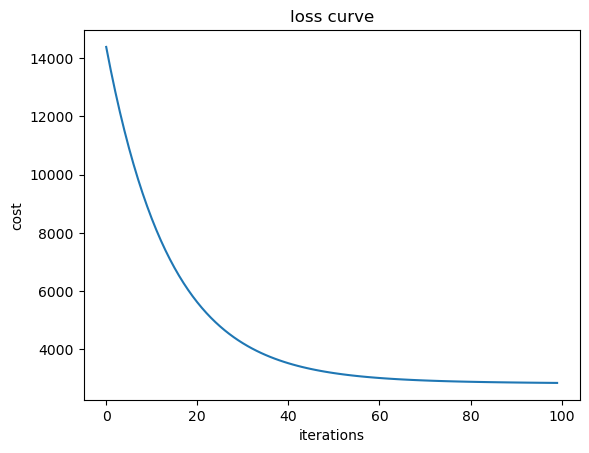

In [21]:
plt.plot(range(len(loss)),loss) 
plt.xlabel('iterations') 
plt.ylabel('cost')
plt.title('loss curve')
plt.show()

### Step3. Repeat Tests

In [22]:
for stepsize in [0.001,0.0005,0.0001]:
    for iteration in [50,100,200,500]:
        w,loss = GradientDescent(train_X2,train_y2,stepsize,iteration)
        RMSE2_train = math.sqrt(np.sum((train_X2.dot(w)-train_y2)*(train_X2.dot(w)-train_y2))/train_y2.shape[0])
        RMSE2_test = math.sqrt(np.sum((test_X2.dot(w)-test_y2)*(test_X2.dot(w)-test_y2))/test_y2.shape[0])
        print("Stepsize: ", stepsize," Iterations times: ", iteration)
        print("RMSE2_train:", RMSE2_train)
        print("RMSE2_test:", RMSE2_test)
        print()

Stepsize:  0.001  Iterations times:  50
RMSE2_train: 72.14711504223072
RMSE2_test: 76.65234088069998

Stepsize:  0.001  Iterations times:  100
RMSE2_train: 69.01996989372154
RMSE2_test: 73.41213303095333

Stepsize:  0.001  Iterations times:  200
RMSE2_train: 64.48617856873055
RMSE2_test: 68.78310818697152

Stepsize:  0.001  Iterations times:  500
RMSE2_train: 58.11004115451901
RMSE2_test: 62.603274589709216

Stepsize:  0.0005  Iterations times:  50
RMSE2_train: 73.989651618783
RMSE2_test: 78.57367063096638

Stepsize:  0.0005  Iterations times:  100
RMSE2_train: 72.1494518636321
RMSE2_test: 76.65489119490617

Stepsize:  0.0005  Iterations times:  200
RMSE2_train: 69.02360457689866
RMSE2_test: 73.41610071001644

Stepsize:  0.0005  Iterations times:  500
RMSE2_train: 62.854002803209966
RMSE2_test: 67.14900745397136

Stepsize:  0.0001  Iterations times:  50
RMSE2_train: 79.68630194432883
RMSE2_test: 84.81588635054277

Stepsize:  0.0001  Iterations times:  100
RMSE2_train: 75.31061423573368